Generating orientation reward visualization...


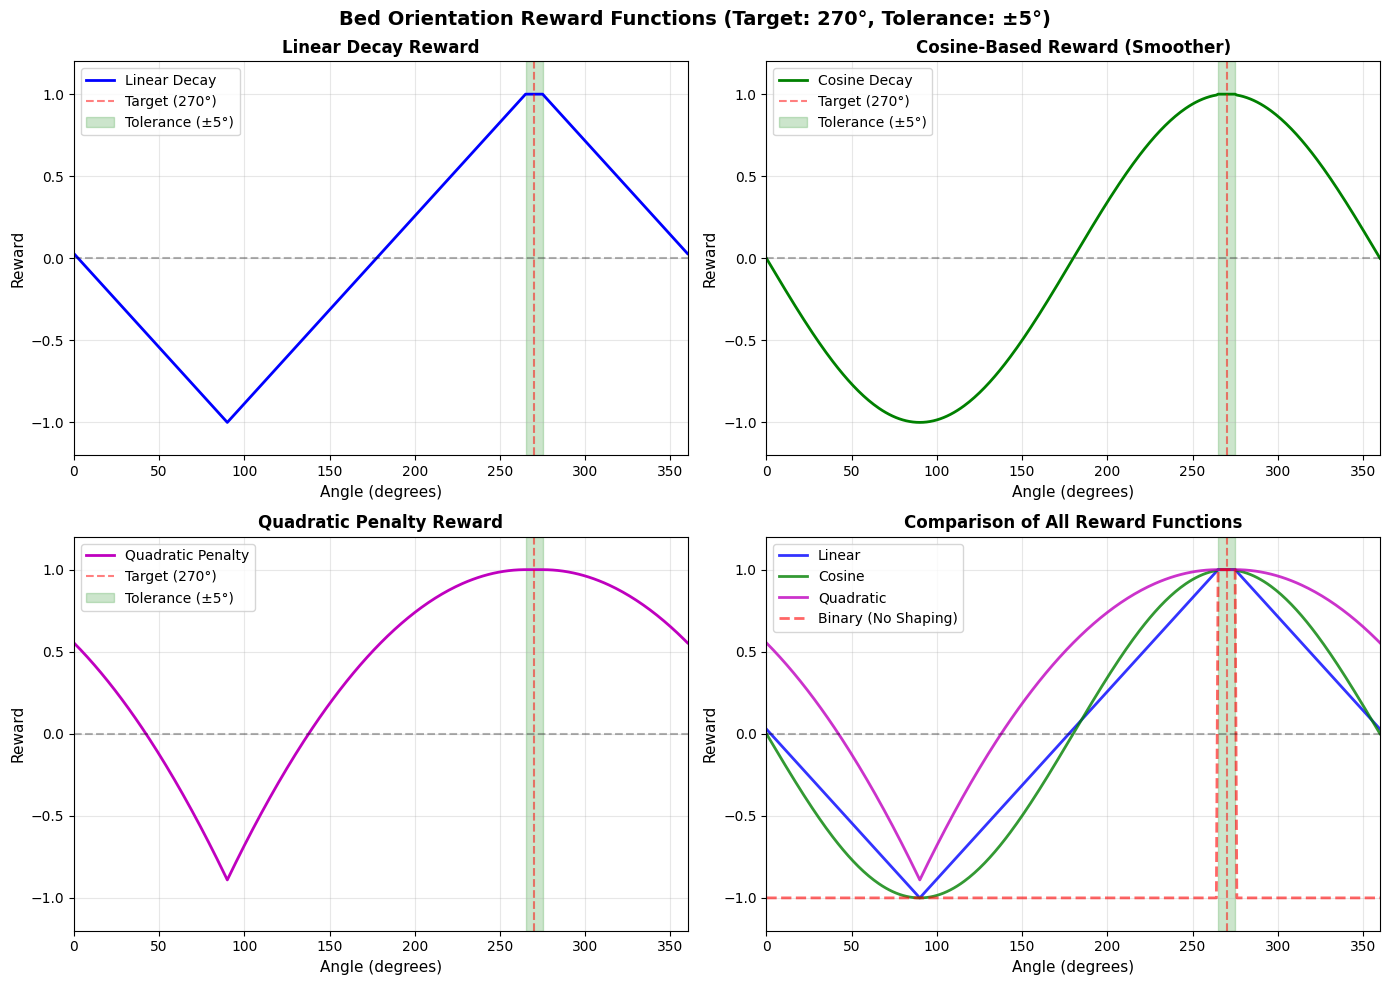


REWARD STATISTICS AT KEY ANGLES

Angle    Distance   Linear     Cosine     Quadratic 
------------------------------------------------------------
    0°     90.0°      0.029      0.000      0.554
   45°    135.0°     -0.486     -0.707     -0.043
   90°    180.0°     -1.000     -1.000     -0.890
  135°    135.0°     -0.486     -0.707     -0.043
  180°     90.0°      0.029      0.000      0.554
  225°     45.0°      0.543      0.707      0.901
  270°      0.0°      1.000      1.000      1.000
  315°     45.0°      0.543      0.707      0.901


GRADIENT ANALYSIS (Change per degree near target)
Linear gradient at 280°:    -0.0057 reward/degree
Cosine gradient at 280°:    -0.0015 reward/degree
Quadratic gradient at 280°: -0.0002 reward/degree

Smoother gradients → More stable RL training


Generating furniture reward visualization...


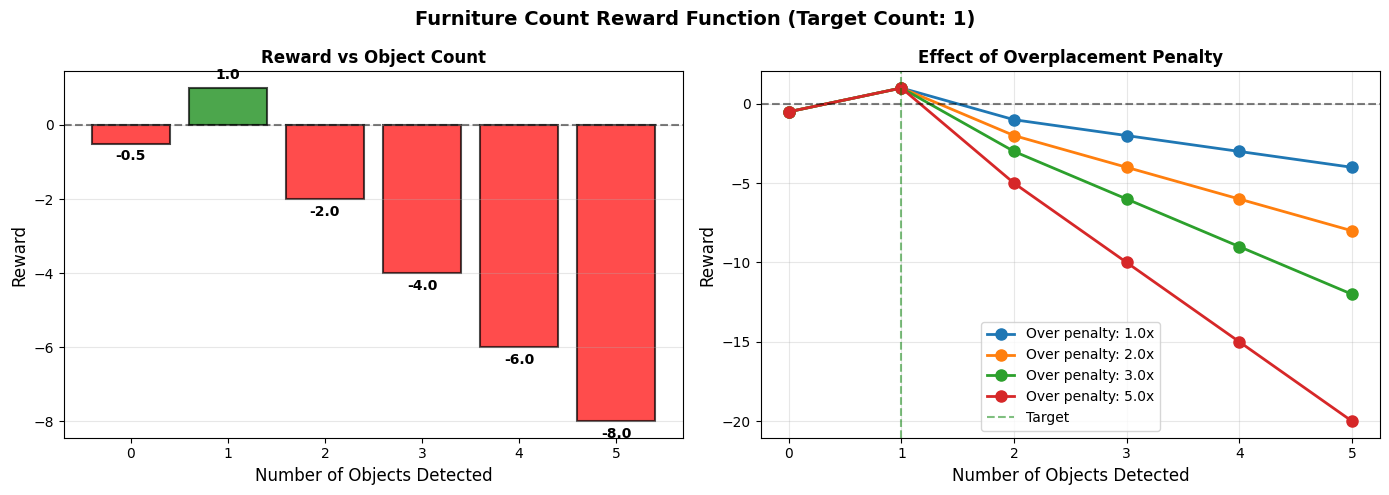


FURNITURE REWARD STATISTICS
Target count: 1
Overplacement penalty: 2.0x
Underplacement penalty: 0.5x

Count    Deviation    Reward     Interpretation
------------------------------------------------------------
0         -1            -0.5     Missing 1 object(s)
1         +0             1.0     ✓ Perfect
2         +1            -2.0     ⚠ 1 extra object(s)
3         +2            -4.0     ⚠ 2 extra object(s)
4         +3            -6.0     ⚠ 3 extra object(s)
5         +4            -8.0     ⚠ 4 extra object(s)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_orientation_rewards():
    """
    Visualize different reward shaping strategies for bed orientation.
    Target angle: 270° (headboard facing East)
    """
    
    # Generate angles from 0 to 360
    angles = np.linspace(0, 360, 361)
    target_angle = 270.0
    tolerance = 5.0
    
    # Calculate angular distances (handle wraparound)
    def angular_distance(theta, target):
        diff = np.abs(theta - target)
        diff = np.where(diff > 180, 360 - diff, diff)
        return diff
    
    diffs = angular_distance(angles, target_angle)
    
    # 1. Linear decay reward
    rewards_linear = np.where(
        diffs <= tolerance,
        1.0,
        1.0 - 2.0 * (diffs - tolerance) / (180.0 - tolerance)
    )
    
    # 2. Cosine-based reward
    rewards_cosine = np.where(
        diffs <= tolerance,
        1.0,
        np.cos(diffs * np.pi / 180.0)
    )
    
    # 3. Quadratic penalty reward
    penalty_quadratic = np.where(
        diffs <= tolerance,
        0.0,
        ((diffs - tolerance) / 180.0) ** 2
    )
    rewards_quadratic = 1.0 - 2.0 * penalty_quadratic
    
    # 4. Binary reward (baseline - no shaping)
    rewards_binary = np.where(diffs <= tolerance, 1.0, -1.0)
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Bed Orientation Reward Functions (Target: 270°, Tolerance: ±5°)', 
                 fontsize=14, fontweight='bold')
    
    # Plot 1: Linear decay
    ax1 = axes[0, 0]
    ax1.plot(angles, rewards_linear, 'b-', linewidth=2, label='Linear Decay')
    ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax1.axvline(x=270, color='r', linestyle='--', alpha=0.5, label='Target (270°)')
    ax1.axvspan(265, 275, alpha=0.2, color='green', label='Tolerance (±5°)')
    ax1.set_xlabel('Angle (degrees)', fontsize=11)
    ax1.set_ylabel('Reward', fontsize=11)
    ax1.set_title('Linear Decay Reward', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_xlim(0, 360)
    ax1.set_ylim(-1.2, 1.2)
    
    # Plot 2: Cosine-based
    ax2 = axes[0, 1]
    ax2.plot(angles, rewards_cosine, 'g-', linewidth=2, label='Cosine Decay')
    ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax2.axvline(x=270, color='r', linestyle='--', alpha=0.5, label='Target (270°)')
    ax2.axvspan(265, 275, alpha=0.2, color='green', label='Tolerance (±5°)')
    ax2.set_xlabel('Angle (degrees)', fontsize=11)
    ax2.set_ylabel('Reward', fontsize=11)
    ax2.set_title('Cosine-Based Reward (Smoother)', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xlim(0, 360)
    ax2.set_ylim(-1.2, 1.2)
    
    # Plot 3: Quadratic penalty
    ax3 = axes[1, 0]
    ax3.plot(angles, rewards_quadratic, 'm-', linewidth=2, label='Quadratic Penalty')
    ax3.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax3.axvline(x=270, color='r', linestyle='--', alpha=0.5, label='Target (270°)')
    ax3.axvspan(265, 275, alpha=0.2, color='green', label='Tolerance (±5°)')
    ax3.set_xlabel('Angle (degrees)', fontsize=11)
    ax3.set_ylabel('Reward', fontsize=11)
    ax3.set_title('Quadratic Penalty Reward', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.set_xlim(0, 360)
    ax3.set_ylim(-1.2, 1.2)
    
    # Plot 4: Comparison of all methods
    ax4 = axes[1, 1]
    ax4.plot(angles, rewards_linear, 'b-', linewidth=2, label='Linear', alpha=0.8)
    ax4.plot(angles, rewards_cosine, 'g-', linewidth=2, label='Cosine', alpha=0.8)
    ax4.plot(angles, rewards_quadratic, 'm-', linewidth=2, label='Quadratic', alpha=0.8)
    ax4.plot(angles, rewards_binary, 'r--', linewidth=2, label='Binary (No Shaping)', alpha=0.6)
    ax4.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax4.axvline(x=270, color='r', linestyle='--', alpha=0.5)
    ax4.axvspan(265, 275, alpha=0.2, color='green')
    ax4.set_xlabel('Angle (degrees)', fontsize=11)
    ax4.set_ylabel('Reward', fontsize=11)
    ax4.set_title('Comparison of All Reward Functions', fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    ax4.set_xlim(0, 360)
    ax4.set_ylim(-1.2, 1.2)
    
    plt.tight_layout()
    plt.savefig('orientation_reward_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print key statistics
    print("\n" + "="*60)
    print("REWARD STATISTICS AT KEY ANGLES")
    print("="*60)
    
    key_angles = [0, 45, 90, 135, 180, 225, 270, 315]
    print(f"\n{'Angle':<8} {'Distance':<10} {'Linear':<10} {'Cosine':<10} {'Quadratic':<10}")
    print("-" * 60)
    
    for angle in key_angles:
        idx = int(angle)
        dist = diffs[idx]
        print(f"{angle:>5}°   {dist:>6.1f}°     "
              f"{rewards_linear[idx]:>6.3f}     "
              f"{rewards_cosine[idx]:>6.3f}     "
              f"{rewards_quadratic[idx]:>6.3f}")
    
    print("\n" + "="*60)
    
    # Calculate gradients (for RL optimization)
    print("\nGRADIENT ANALYSIS (Change per degree near target)")
    print("="*60)
    
    # Check gradient at 280° (10° away from target)
    idx_280 = 280
    idx_270 = 270
    
    grad_linear = (rewards_linear[idx_280] - rewards_linear[idx_270]) / 10
    grad_cosine = (rewards_cosine[idx_280] - rewards_cosine[idx_270]) / 10
    grad_quadratic = (rewards_quadratic[idx_280] - rewards_quadratic[idx_270]) / 10
    
    print(f"Linear gradient at 280°:    {grad_linear:.4f} reward/degree")
    print(f"Cosine gradient at 280°:    {grad_cosine:.4f} reward/degree")
    print(f"Quadratic gradient at 280°: {grad_quadratic:.4f} reward/degree")
    print("\nSmoother gradients → More stable RL training")
    print("="*60)


def visualize_furniture_rewards():
    """
    Visualize furniture count rewards (TV, desk, chair).
    """
    
    counts = np.arange(0, 6)  # 0 to 5 objects
    target_count = 1
    
    # Parameters
    overplacement_penalty = 2.0
    underplacement_penalty = 0.5
    
    # Calculate rewards
    deviation = counts - target_count
    rewards = np.where(
        deviation == 0,
        1.0,
        np.where(
            deviation < 0,
            deviation * underplacement_penalty,
            -deviation * overplacement_penalty
        )
    )
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle('Furniture Count Reward Function (Target Count: 1)', 
                 fontsize=14, fontweight='bold')
    
    # Plot 1: Bar chart
    colors = ['red' if c != target_count else 'green' for c in counts]
    ax1.bar(counts, rewards, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    ax1.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    ax1.set_xlabel('Number of Objects Detected', fontsize=12)
    ax1.set_ylabel('Reward', fontsize=12)
    ax1.set_title('Reward vs Object Count', fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_xticks(counts)
    
    # Add value labels on bars
    for i, (c, r) in enumerate(zip(counts, rewards)):
        ax1.text(c, r + 0.15 if r >= 0 else r - 0.15, f'{r:.1f}', 
                ha='center', va='bottom' if r >= 0 else 'top', 
                fontweight='bold', fontsize=10)
    
    # Plot 2: Multiple penalty scenarios
    penalties_over = [1.0, 2.0, 3.0, 5.0]
    penalty_under = 0.5
    
    for p_over in penalties_over:
        deviation = counts - target_count
        rewards_scenario = np.where(
            deviation == 0,
            1.0,
            np.where(
                deviation < 0,
                deviation * penalty_under,
                -deviation * p_over
            )
        )
        ax2.plot(counts, rewards_scenario, marker='o', linewidth=2, 
                label=f'Over penalty: {p_over}x', markersize=8)
    
    ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    ax2.axvline(x=target_count, color='g', linestyle='--', alpha=0.5, label='Target')
    ax2.set_xlabel('Number of Objects Detected', fontsize=12)
    ax2.set_ylabel('Reward', fontsize=12)
    ax2.set_title('Effect of Overplacement Penalty', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xticks(counts)
    
    plt.tight_layout()
    plt.savefig('furniture_reward_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print statistics
    print("\n" + "="*60)
    print("FURNITURE REWARD STATISTICS")
    print("="*60)
    print(f"Target count: {target_count}")
    print(f"Overplacement penalty: {overplacement_penalty}x")
    print(f"Underplacement penalty: {underplacement_penalty}x")
    print()
    print(f"{'Count':<8} {'Deviation':<12} {'Reward':<10} {'Interpretation'}")
    print("-" * 60)
    
    for c, r in zip(counts, rewards):
        dev = c - target_count
        if dev == 0:
            interp = "✓ Perfect"
        elif dev < 0:
            interp = f"Missing {abs(dev)} object(s)"
        else:
            interp = f"⚠ {dev} extra object(s)"
        
        print(f"{c:<8} {dev:>+3}          {r:>6.1f}     {interp}")
    
    print("="*60)


# Run both visualizations
if __name__ == "__main__":
    print("Generating orientation reward visualization...")
    visualize_orientation_rewards()
    
    print("\n\nGenerating furniture reward visualization...")
    visualize_furniture_rewards()

In [10]:
import torch

def get_object_present_reward_potential(one_hot, class_label, idx_to_labels, threshold=0.5):
    """
    Calculate reward signal: +1 if target class is present, else -1 + potential.
    Potential is (1 - min_distance) to encourage getting closer to detection.
    
    Args:
        one_hot: (B, N, num_classes) - One-hot encoded classes (output from nn model)
                 Max class has values near 1.0, others near -1.0
        class_label: string, e.g. "ceiling_lamp"
        idx_to_labels: dict, {idx: label}
        threshold: float, score above this is considered "present" (default: 0.5)
    
    Returns:
        rewards: (B,) - For each batch: +1 if class present, else -1 + potential
    """
    # Find the class index for the target label
    label_to_idx = {v: k for k, v in idx_to_labels.items()}
    
    if class_label not in label_to_idx:
        raise ValueError(f"Class label '{class_label}' not found in idx_to_labels")
    
    target_idx = label_to_idx[class_label]
    
    # Extract the target class scores: (B, N)
    target_scores = one_hot[:, :, target_idx]
    
    # Find max score across N dimension for each batch: (B,)
    max_scores = torch.max(target_scores, dim=1).values
    
    # Calculate rewards
    rewards = torch.where(
        max_scores > threshold,
        1.0,  # Class is present: +1
        -1.0 + max_scores  # Class absent: -1 + potential (max_score)
    )
    
    return rewards


# Test Cases
def test_get_object_present_reward_potential():
    """Run test cases to verify the function works correctly"""
    
    print("=" * 60)
    print("TEST 1: Class PRESENT - should return +1")
    print("=" * 60)
    
    idx_to_labels = {0: "chair", 1: "table", 2: "ceiling_lamp", 3: "floor"}
    
    # Object 1 has ceiling_lamp with score 0.92 (> 0.5 threshold)
    one_hot = torch.tensor([
        [
            [0.95, -0.9, -0.85, -0.8],   # chair
            [-0.9, -0.85, 0.92, -0.88],  # ceiling_lamp (PRESENT!)
            [-0.8, 0.88, -0.9, -0.85]    # table
        ]
    ])
    
    result = get_object_present_reward_potential(one_hot, "ceiling_lamp", idx_to_labels)
    expected = [1.0]
    
    print(f"Max ceiling_lamp score: 0.92 > 0.5 threshold")
    print(f"Result: {result}")
    print(f"Expected: {expected}")
    print(f"✓ Test passed!" if torch.allclose(result, torch.tensor(expected)) else "✗ Test failed!")
    print()
    
    print("=" * 60)
    print("TEST 2: Class ABSENT - should return -1 + potential")
    print("=" * 60)
    
    # Best ceiling_lamp score is 0.35 (< 0.5 threshold)
    one_hot = torch.tensor([
        [
            [0.95, -0.9, -0.85, -0.8],   # chair
            [-0.9, -0.85, 0.35, -0.88],  # weak ceiling_lamp signal
            [-0.8, 0.88, -0.9, -0.85]    # table
        ]
    ])
    
    result = get_object_present_reward_potential(one_hot, "ceiling_lamp", idx_to_labels)
    expected = [-1.0 + 0.35]  # -0.65
    
    print(f"Max ceiling_lamp score: 0.35 < 0.5 threshold (ABSENT)")
    print(f"Reward: -1 + 0.35 = {expected[0]}")
    print(f"Result: {result}")
    print(f"Expected: {expected}")
    print(f"✓ Test passed!" if np.allclose(result, expected) else "✗ Test failed!")
    print()
    
    print("=" * 60)
    print("TEST 3: Multiple batches - mixed results")
    print("=" * 60)
    
    one_hot = torch.tensor([
        [  # Batch 0: PRESENT (0.85 > 0.5)
            [0.98, -0.9, -0.85, -0.8],
            [-0.9, -0.85, 0.85, -0.88],  # ceiling_lamp present
            [-0.8, 0.88, -0.9, -0.85]
        ],
        [  # Batch 1: ABSENT (0.30 < 0.5)
            [-0.95, -0.9, 0.30, -0.8],   # weak ceiling_lamp
            [-0.9, 0.92, -0.85, -0.88],
            [0.87, -0.85, -0.9, -0.85]
        ],
        [  # Batch 2: PRESENT (0.99 > 0.5)
            [-0.95, -0.9, -0.6, -0.8],   # strong ceiling_lamp
            [-0.9, 0.92, -0.85, -0.88],
            [0.87, -0.85, -0.9, -0.85]
        ]
    ])
    
    result = get_object_present_reward_potential(one_hot, "ceiling_lamp", idx_to_labels)
    print(f"Result: {result}")
    

if __name__ == "__main__":
    # Run all tests
    test_get_object_present_reward_potential()


TEST 1: Class PRESENT - should return +1
Max ceiling_lamp score: 0.92 > 0.5 threshold
Result: tensor([1.])
Expected: [1.0]
✓ Test passed!

TEST 2: Class ABSENT - should return -1 + potential
Max ceiling_lamp score: 0.35 < 0.5 threshold (ABSENT)
Reward: -1 + 0.35 = -0.65
Result: tensor([-0.6500])
Expected: [-0.65]
✓ Test passed!

TEST 3: Multiple batches - mixed results
Result: tensor([ 1.0000, -0.7000, -1.6000])


In [2]:
import torch 
total_penetration = torch.tensor([1,2, 0,1,0,0,0])
reward = torch.where(
        total_penetration == 0,
        torch.ones_like(total_penetration),
        -total_penetration
    )
print(reward)

tensor([-1, -2,  1, -1,  1,  1,  1])


a_z min -0.14 max 14.09 
b_z min -0.98 max 11.90 
c_z min -3.23 max 1.55 


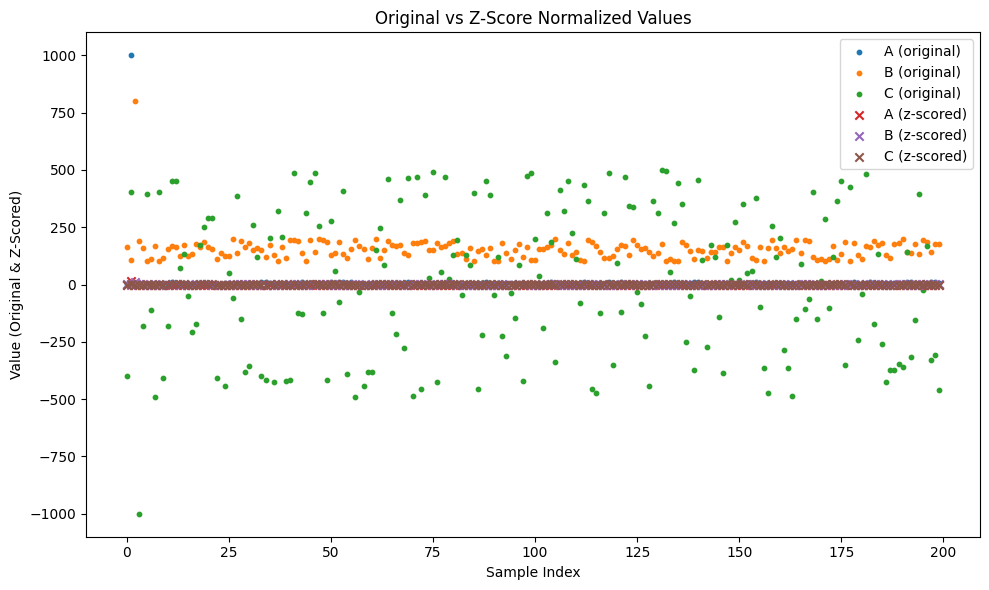

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic UI component magnitudes in different ranges
np.random.seed(42)
component_a = np.random.uniform(0, 10, 200)      # Range ~0–10
component_b = np.random.uniform(100, 200, 200)  # Range ~100–200
component_c = np.random.uniform(-500, 500, 200) # Range ~-500–500

# Inject some huge outliers (deterministic because seed set above)
# n_outliers = 3
# idx_a = np.random.choice(len(component_a), n_outliers, replace=False)
# idx_b = np.random.choice(len(component_b), n_outliers, replace=False)
# idx_c = np.random.choice(len(component_c), n_outliers, replace=False)
idx_a, idx_b, idx_c = 1,2,3
# Make the outliers very large / extreme
component_a[idx_a] = 1e3           # very large positive outliers in A
component_b[idx_b] = 800           # huge positive offsets in B
component_c[idx_c] = -1e3          # very large negative/positive flips in C

# Z-score normalization
def zscore(x):
    return (x - np.mean(x)) / np.std(x)

a_z = zscore(component_a)
b_z = zscore(component_b)
c_z = zscore(component_c)

print(f"a_z min {np.min(a_z):.2f} max {np.max(a_z):.2f} ")
print(f"b_z min {np.min(b_z):.2f} max {np.max(b_z):.2f} ")
print(f"c_z min {np.min(c_z):.2f} max {np.max(c_z):.2f} ")

# Plot before and after normalization
plt.figure(figsize=(10, 6))
plt.scatter(range(len(component_a)), component_a, label="A (original)", s=10)
plt.scatter(range(len(component_b)), component_b, label="B (original)", s=10)
plt.scatter(range(len(component_c)), component_c, label="C (original)", s=10)
plt.scatter(range(len(a_z)), a_z, label="A (z-scored)", marker="x")
plt.scatter(range(len(b_z)), b_z, label="B (z-scored)", marker="x")
plt.scatter(range(len(c_z)), c_z, label="C (z-scored)", marker="x")
plt.legend()
plt.title("Original vs Z-Score Normalized Values")
plt.xlabel("Sample Index")
plt.ylabel("Value (Original & Z-Scored)")
plt.tight_layout()
plt.show()


In [5]:
# different generator for different room types, so different dataset_context for each room type
ROOM_TYPE = "bedroom"
# general intro, idx_to_labels, coordinate system, measurement units,
def get_dataset_context(room_type):
    if room_type == "bedroom":
        dataset_context = {  
            "room_type": "bedroom",
            "total_scenes": 4042,
            "class_frequencies": {
                "nightstand": 0.27245508982035926,
                "double_bed": 0.17138137518067315,
                "wardrobe": 0.16079909147222796,
                "pendant_lamp": 0.12693578360520338,
                "ceiling_lamp": 0.06308073508156102,
                "tv_stand": 0.029888498864340286,
                "chair": 0.022816436093330582,
                "single_bed": 0.021216188313029113,
                "dressing_table": 0.020854842040057817,
                "cabinet": 0.020183770390253975,
                "table": 0.019667561428866404,
                "desk": 0.016260582283708445,
                "stool": 0.011459838942804047,
                "shelf": 0.0081561015899236,
                "kids_bed": 0.0081561015899236,
                "bookshelf": 0.0071753045632872185,
                "children_cabinet": 0.0071753045632872185,
                "dressing_chair": 0.006142886640512079,
                "armchair": 0.003716704521990502,
                "sofa": 0.0014970059880239522,
                "coffee_table": 0.0009807970266363824
            },
            "furniture_counts": {
                "nightstand": 5278,
                "double_bed": 3320,
                "wardrobe": 3115,
                "pendant_lamp": 2459,
                "ceiling_lamp": 1222,
                "tv_stand": 579,
                "chair": 442,
                "single_bed": 411,
                "dressing_table": 404,
                "cabinet": 391,
                "table": 381,
                "desk": 315,
                "stool": 222,
                "shelf": 158,
                "kids_bed": 158,
                "bookshelf": 139,
                "children_cabinet": 139,
                "dressing_chair": 119,
                "armchair": 72,
                "sofa": 29,
                "coffee_table": 19
            },
            "idx_to_labels": {
                "0": "armchair",
                "1": "bookshelf",
                "2": "cabinet",
                "3": "ceiling_lamp",
                "4": "chair",
                "5": "children_cabinet",
                "6": "coffee_table",
                "7": "desk",
                "8": "double_bed",
                "9": "dressing_chair",
                "10": "dressing_table",
                "11": "kids_bed",
                "12": "nightstand",
                "13": "pendant_lamp",
                "14": "shelf",
                "15": "single_bed",
                "16": "sofa",
                "17": "stool",
                "18": "table",
                "19": "tv_stand",
                "20": "wardrobe",
                "21": "empty"
            },
            "num_classes_with_empty": 22,
            "num_classes_without_empty": 21,
            "room_type": "bedroom",
            "max_objects": 12
        }
    elif room_type == "livingroom":
        dataset_context = {
            "room_type": "livingroom",
        "total_scenes": 2926,
        "class_frequencies": {
                "dining_chair": 0.25492085340674464,
                "pendant_lamp": 0.13282863041982107,
                "coffee_table": 0.08616655196145905,
                "corner_side_table": 0.07240192704748796,
                "dining_table": 0.06951135581555402,
                "tv_stand": 0.06221610461114935,
                "multi_seat_sofa": 0.05299380591878871,
                "armchair": 0.048313833448038544,
                "console_table": 0.037026841018582245,
                "lounge_chair": 0.03234686854783207,
                "stool": 0.0264280798348245,
                "cabinet": 0.023124569855471438,
                "bookshelf": 0.02202339986235375,
                "loveseat_sofa": 0.020922229869236062,
                "ceiling_lamp": 0.018169304886441844,
                "wine_cabinet": 0.012112869924294563,
                "l_shaped_sofa": 0.01032346868547832,
                "round_end_table": 0.0057811424638678595,
                "shelf": 0.0035788024776324846,
                "chinese_chair": 0.0031658637302133517,
                "wardrobe": 0.0027529249827942187,
                "chaise_longue_sofa": 0.0011011699931176876,
                "desk": 0.0009635237439779766,
                "lazy_sofa": 0.0008258774948382657
            },
            "furniture_counts": {
                "dining_chair": 1852,
                "pendant_lamp": 965,
                "coffee_table": 626,
                "corner_side_table": 526,
                "dining_table": 505,
                "tv_stand": 452,
                "multi_seat_sofa": 385,
                "armchair": 351,
                "console_table": 269,
                "lounge_chair": 235,
                "stool": 192,
                "cabinet": 168,
                "bookshelf": 160,
                "loveseat_sofa": 152,
                "ceiling_lamp": 132,
                "wine_cabinet": 88,
                "l_shaped_sofa": 75,
                "round_end_table": 42,
                "shelf": 26,
                "chinese_chair": 23,
                "wardrobe": 20,
                "chaise_longue_sofa": 8,
                "desk": 7,
                "lazy_sofa": 6
            },
            "idx_to_labels": {
                "0": "armchair",
                "1": "bookshelf",
                "2": "cabinet",
                "3": "ceiling_lamp",
                "4": "chaise_longue_sofa",
                "5": "chinese_chair",
                "6": "coffee_table",
                "7": "console_table",
                "8": "corner_side_table",
                "9": "desk",
                "10": "dining_chair",
                "11": "dining_table",
                "12": "l_shaped_sofa",
                "13": "lazy_sofa",
                "14": "lounge_chair",
                "15": "loveseat_sofa",
                "16": "multi_seat_sofa",
                "17": "pendant_lamp",
                "18": "round_end_table",
                "19": "shelf",
                "20": "stool",
                "21": "tv_stand",
                "22": "wardrobe",
                "23": "wine_cabinet",
                "24": "empty"
                },
            "num_classes_with_empty": 25,
            "num_classes_without_empty": 24,
            "room_type": "livingroom",
            "max_objects": 21
        }
    else:
        raise ValueError(f"Room type {room_type} not supported")

    return dataset_context

In [4]:
get_dataset_context("bedroom")

{'room_type': 'bedroom',
 'total_scenes': 4042,
 'class_frequencies': {'nightstand': 0.27245508982035926,
  'double_bed': 0.17138137518067315,
  'wardrobe': 0.16079909147222796,
  'pendant_lamp': 0.12693578360520338,
  'ceiling_lamp': 0.06308073508156102,
  'tv_stand': 0.029888498864340286,
  'chair': 0.022816436093330582,
  'single_bed': 0.021216188313029113,
  'dressing_table': 0.020854842040057817,
  'cabinet': 0.020183770390253975,
  'table': 0.019667561428866404,
  'desk': 0.016260582283708445,
  'stool': 0.011459838942804047,
  'shelf': 0.0081561015899236,
  'kids_bed': 0.0081561015899236,
  'bookshelf': 0.0071753045632872185,
  'children_cabinet': 0.0071753045632872185,
  'dressing_chair': 0.006142886640512079,
  'armchair': 0.003716704521990502,
  'sofa': 0.0014970059880239522,
  'coffee_table': 0.0009807970266363824},
 'furniture_counts': {'nightstand': 5278,
  'double_bed': 3320,
  'wardrobe': 3115,
  'pendant_lamp': 2459,
  'ceiling_lamp': 1222,
  'tv_stand': 579,
  'chair':

In [1]:
import numpy as np

# Bounds for fpoc are [-2.995450019836426, -3.0, 2.995450019836426, 3.0]
fpoc_min_x = -2.995450019836426
fpoc_min_z = -3.0
fpoc_max_x = 2.995450019836426
fpoc_max_z = 3.0

# A simple square floor plan
polygon_world = np.array([[-1.77205, -2.0955 ],
       [-1.77205,  2.0955 ],
       [ 1.77205,  2.0955 ],
       [ 1.77205, -2.0955 ]])


# 1) Compute centroid and recenter around origin
# centroid = polygon_world.mean(axis=0)
# polygon_centered = polygon_world - centroid[None, :]

# # 2) Uniformly scale to fit exactly inside the fpoc bounds
# # The target box is [min_x, min_z] to [max_x, max_z]
# target_half_width_x = (fpoc_max_x - fpoc_min_x) / 2
# target_half_width_z = (fpoc_max_z - fpoc_min_z) / 2
# max_abs_x = np.abs(polygon_centered[:, 0]).max()
# max_abs_z = np.abs(polygon_centered[:, 1]).max()
# scale_x = target_half_width_x / max_abs_x if max_abs_x > 0 else 1.0
# scale_z = target_half_width_z / max_abs_z if max_abs_z > 0 else 1.0
# scale = min(scale_x, scale_z)  # Uniform scaling

# polygon_normalized = polygon_centered * scale

# # 3) Optionally, translate to be centered at (mean of bounds)
# fpoc_center = np.array([(fpoc_min_x + fpoc_max_x) / 2, (fpoc_min_z + fpoc_max_z) / 2])
# polygon_normalized = polygon_normalized + fpoc_center[None, :]

# print(polygon_normalized)

# Save normalized polygon for use with preprocess_floorplan_custom.py
out_path = "/media/ajad/YourBook/AshokSaugatResearchBackup/AshokSaugatResearch/steerable-scene-generation/tmp/polygon_world.npy"
np.save(out_path, polygon_world)
print("Saved normalized polygon to:", out_path)
# print("min (x, z):", polygon_normalized.min(axis=0), "max (x, z):", polygon_normalized.max(axis=0))

Saved normalized polygon to: /media/ajad/YourBook/AshokSaugatResearchBackup/AshokSaugatResearch/steerable-scene-generation/tmp/polygon_world.npy


In [4]:
polygon_world = np.load("/media/ajad/YourBook/AshokSaugatResearchBackup/AshokSaugatResearch/steerable-scene-generation/tmp/polygon_world.npy")
polygon_world

array([[-1.77205, -2.0955 ],
       [-1.77205,  2.0955 ],
       [ 1.77205,  2.0955 ],
       [ 1.77205, -2.0955 ]])

GENERATED NPZ (not working):
Keys: ['floor_plan_vertices', 'floor_plan_faces', 'floor_plan_centroid']

floor_plan_vertices shape: (4, 3)
floor_plan_vertices:
 [[-5.8  0.  -5.8]
 [ 0.   0.  -5.8]
 [ 0.   0.   0. ]
 [-5.8  0.   0. ]]

floor_plan_faces shape: (2, 3)
floor_plan_faces:
 [[0 1 2]
 [0 2 3]]

floor_plan_centroid: [-2.9  0.  -2.9]

Vertices AFTER centroid subtraction:
[[-2.9  0.  -2.9]
 [ 2.9  0.  -2.9]
 [ 2.9  0.   2.9]
 [-2.9  0.   2.9]]
X range: -2.9 to 2.9
Z range: -2.9 to 2.9

DATASET NPZ (working):
Keys: ['floor_plan_centroid', 'floor_plan_faces', 'floor_plan_vertices', 'room_outer_box']

floor_plan_vertices shape: (12, 3)
floor_plan_vertices:
 [[-1.8165  0.     -4.2375]
 [-5.8365  0.     -1.1625]
 [-5.8365  0.     -4.2375]
 [-5.8365  0.     -1.1625]
 [-1.8165  0.     -4.2375]
 [-1.8165  0.     -2.1575]
 [-5.8365  0.     -1.1625]
 [-1.8165  0.     -2.1575]
 [-0.0165  0.     -1.1625]
 [-0.0165  0.     -1.1625]
 [-1.8165  0.     -2.1575]
 [-0.0165  0.     -2.1575]]

floor_p

In [2]:
floor_plan = np.load("/media/ajad/YourBook/AshokSaugatResearchBackup/AshokSaugatResearch/steerable-scene-generation/tmp/floor_plan_world.npz")
floor_plan["floor_plan_vertices"], floor_plan["floor_plan_faces"], floor_plan["floor_plan_centroid"]

(array([[-1.77205,  0.     , -2.0955 ],
        [-1.77205,  0.     ,  2.0955 ],
        [ 1.77205,  0.     ,  2.0955 ],
        [-1.77205,  0.     , -2.0955 ],
        [ 1.77205,  0.     ,  2.0955 ],
        [ 1.77205,  0.     , -2.0955 ]]),
 array([[0, 1, 2],
        [3, 4, 5]]),
 array([0., 0., 0.]))

In [50]:
fpbpn_1 = np.load("/media/ajad/YourBook/AshokSaugatResearchBackup/AshokSaugatResearch/steerable-scene-generation/tmp/polygon_world_fpbpn.npy")
fpbpn_2 = np.load("/media/ajad/YourBook/AshokSaugatResearchBackup/AshokSaugatResearch/steerable-scene-generation/outputs/2025-12-17/06-52-15/fpbpn_sample_idx_0.npy")

print(fpbpn_1.shape)
print(fpbpn_2.shape)



(256, 4)
(256, 4)


In [55]:
fpbpn_1

array([[-2.9910166,  2.39636  ,  0.       , -1.       ],
       [-2.8371341,  2.39636  ,  0.       , -1.       ],
       [-2.8243454,  2.39636  ,  0.       , -1.       ],
       ...,
       [-2.99545  ,  2.2087522,  1.       , -0.       ],
       [-2.99545  ,  2.2918072,  1.       , -0.       ],
       [-2.99545  ,  2.3431764,  1.       , -0.       ]], dtype=float32)

In [56]:
fpbpn_2

array([[-0.9714734 , -0.5027983 ,  1.        ,  0.        ],
       [-0.9714734 , -0.4875195 ,  1.        ,  0.        ],
       [-0.9714734 , -0.45573425,  1.        ,  0.        ],
       ...,
       [-0.9022512 , -0.51250005,  0.        ,  1.        ],
       [-0.9414564 , -0.51250005,  0.        ,  1.        ],
       [-0.96116626, -0.51250005,  0.        ,  1.        ]],
      dtype=float32)

In [38]:
import os
scenes = os.listdir("/media/ajad/YourBook/AshokSaugatResearchBackup/AshokSaugatResearch/steerable-scene-generation/MiData/bedroom")
random_scene = np.random.choice(scenes)
print(random_scene)
boxes = np.load(f"/media/ajad/YourBook/AshokSaugatResearchBackup/AshokSaugatResearch/steerable-scene-generation/MiData/bedroom/{random_scene}/boxes.npz")

7f3ba261-a531-4e30-b760-515f57ca1b5c_Bedroom-6864


In [39]:
list(boxes.keys())


['uids',
 'jids',
 'scene_id',
 'scene_uid',
 'scene_type',
 'json_path',
 'room_layout',
 'floor_plan_vertices',
 'floor_plan_faces',
 'floor_plan_centroid',
 'class_labels',
 'translations',
 'sizes',
 'angles',
 'objfeats',
 'objfeats_32',
 'floor_plan_ordered_corners',
 'floor_plan_boundary_points_normals']

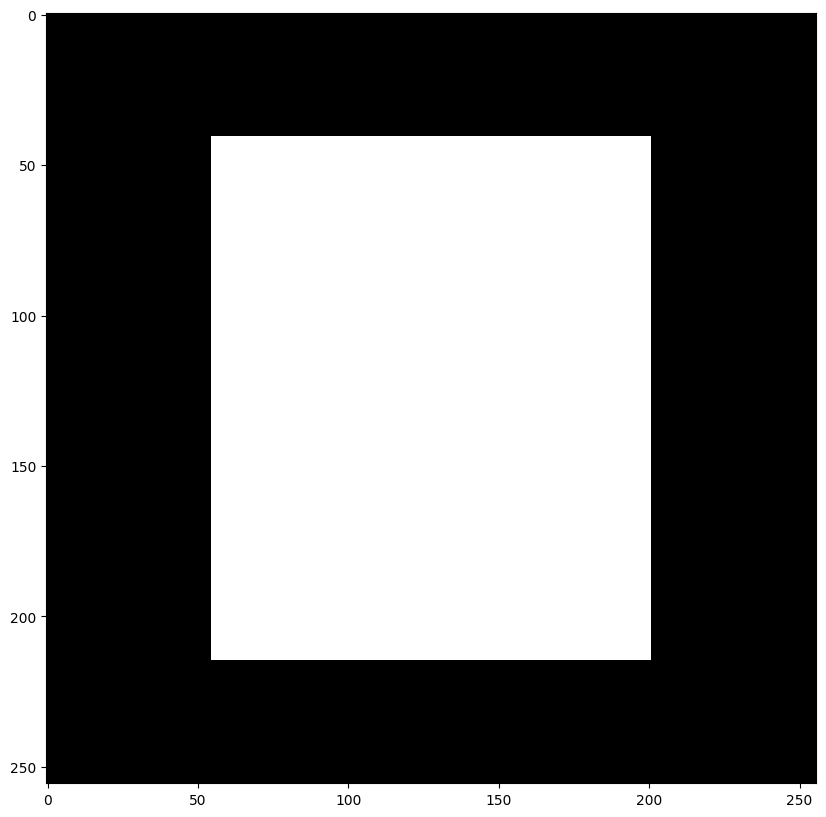

In [40]:
# Visualize boxes["room_layout"]
import matplotlib.pyplot as plt

# Get the room layout from boxes
room_layout = boxes["room_layout"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the room layout
ax.imshow(room_layout, cmap='gray')



In [41]:
boxes["floor_plan_vertices"].shape, boxes["floor_plan_faces"].shape, boxes["floor_plan_centroid"]


((6, 3), (2, 3), array([ 3.39105,  0.     , -0.4086 ]))

In [42]:
boxes["floor_plan_vertices"]


array([[ 5.1631,  0.    , -2.5041],
       [ 1.619 ,  0.    ,  1.6869],
       [ 1.619 ,  0.    , -2.5041],
       [ 1.619 ,  0.    ,  1.6869],
       [ 5.1631,  0.    , -2.5041],
       [ 5.1631,  0.    ,  1.6869]])

In [67]:
boxes["floor_plan_ordered_corners"]

array([[-1.77205, -2.0955 ],
       [-1.77205,  2.0955 ],
       [ 1.77205,  2.0955 ],
       [ 1.77205, -2.0955 ]], dtype=float32)

In [68]:
boxes["floor_plan_boundary_points_normals"]

array([[-1.77205  , -2.0757601,  1.       , -0.       ],
       [-1.77205  , -2.0066078,  1.       , -0.       ],
       [-1.77205  , -1.9555988,  1.       , -0.       ],
       ...,
       [-1.6243117, -2.0955   ,  0.       ,  1.       ],
       [-1.7047604, -2.0955   ,  0.       ,  1.       ],
       [-1.7174938, -2.0955   ,  0.       ,  1.       ]], dtype=float32)

In [43]:
boxes["floor_plan_faces"]


array([[0, 2, 1],
       [3, 5, 4]])

In [47]:
floor = np.load(f"/media/ajad/YourBook/AshokSaugatResearchBackup/AshokSaugatResearch/steerable-scene-generation/tmp/floor_plan_world.npz")
floor["floor_plan_vertices"], floor["floor_plan_faces"], floor["floor_plan_centroid"]


(array([[-6.,  0., -6.],
        [ 0.,  0., -6.],
        [ 0.,  0., -2.],
        [-2.,  0., -2.],
        [-2.,  0.,  0.],
        [-6.,  0.,  0.]]),
 array([[0, 2, 1],
        [0, 3, 2],
        [0, 4, 3],
        [0, 5, 4]]),
 array([-2.66666667,  0.        , -2.66666667]))

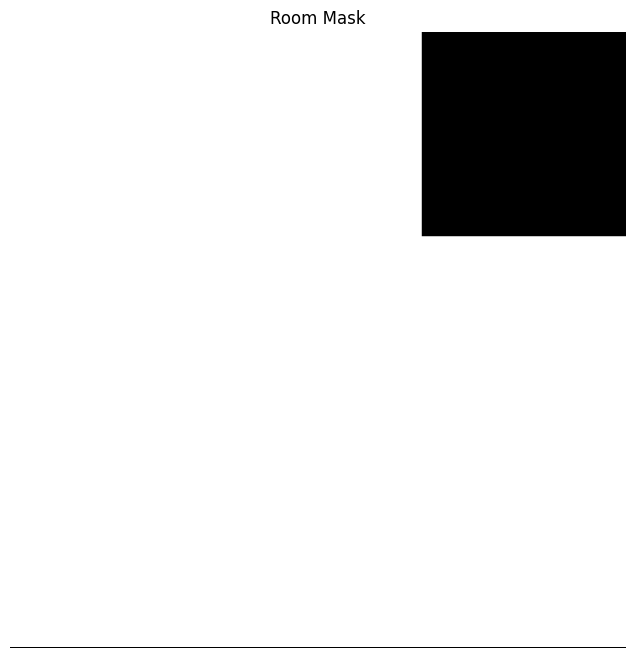

In [48]:
# Create a mask for the room given the floor_plan_vertices and faces

import numpy as np

# Get vertices for the room
vertices = floor["floor_plan_vertices"]  # Should be (N, 3)
faces = floor["floor_plan_faces"]  # Should be (M, 3)
centroid = floor["floor_plan_centroid"]  # (3,)

# Project to XY plane (ignore Z)
verts_2d = vertices[:, [0, 2]]

# Find bounds to determine mask size
min_xy = verts_2d.min(axis=0)
max_xy = verts_2d.max(axis=0)

# Set resolution (pixels per unit)
resolution = 100  # change if mask is too large or small

size_x = int(np.ceil((max_xy[0] - min_xy[0]) * resolution))
size_y = int(np.ceil((max_xy[1] - min_xy[1]) * resolution))

mask = np.zeros((size_y, size_x), dtype=np.uint8)

# Draw filled polygon for the room mask using matplotlib.path
from matplotlib.path import Path

# Get room boundary in order (assuming vertices are ordered, else convex hull)
boundary = verts_2d
boundary_pixel = (boundary - min_xy) * resolution  # shift to (0, 0), scale

# Create mesh grid of pixel centers
yy, xx = np.mgrid[0:size_y, 0:size_x]
points = np.stack([xx.ravel(), yy.ravel()], axis=-1)

p = Path(boundary_pixel)
mask_flat = p.contains_points(points)
mask = mask_flat.reshape((size_y, size_x))

# Visualize the mask
plt.figure(figsize=(8, 8))
plt.imshow(mask, cmap='gray', origin='lower')
plt.title("Room Mask")
plt.axis('off')
plt.show()
